In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

from sklearn import metrics 

In [2]:
df = pd.read_excel('OppScrData.xlsx')  
df = df.iloc[: , :52]

## Predicting heart failure as a binary variable

In [3]:
df_filtered =  df.iloc[:, 41:52]
df_filtered["Heart failure DX"] = df["Heart failure DX"]
df_filtered["DEATH [d from CT]"] = df["DEATH [d from CT]"]

df_filtered['Heart failure DX'] = df_filtered['Heart failure DX'].fillna(0)
df_filtered["DEATH [d from CT]"] = df_filtered["DEATH [d from CT]"].fillna(0)

df_filtered.loc[df_filtered['DEATH [d from CT]']== 0,'Death' ] = 0
df_filtered.loc[df_filtered['DEATH [d from CT]']>0,'Death' ] = 1

df_filtered.loc[df_filtered['Heart failure DX']== 0,'Heart Failure' ] = 0
df_filtered.loc[df_filtered['Heart failure DX'] != 0,'Heart Failure' ] = 1

In [4]:
## Filtering the dataset
death_df = df_filtered[df_filtered['Death']!=0]

In [5]:
for i in range(15):
    death_df.iloc[:,i] = pd.to_numeric(death_df.iloc[:,i], errors='coerce')
    
for i in range(11):
    death_df.iloc[:,i].fillna(value=death_df.iloc[:,i].mean(),inplace = True)



<ipython-input-5-a46515058fb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_df.iloc[:,i] = pd.to_numeric(death_df.iloc[:,i], errors='coerce')


In [6]:
death_df.head()
death_df["Heart Failure"].value_counts()

0.0    366
1.0    183
Name: Heart Failure, dtype: int64

In [7]:
X = np.array(death_df.iloc[:,0:11])
Y = np.array(death_df.iloc[:,-1])


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.20)

### Model 1: Random Forest

In [9]:
clf = RandomForestClassifier(n_estimators = 100) 

clf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
y_pred = clf.predict(X_train)
 
print("TRAINING ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred))

y_pred = clf.predict(X_test)
 
print("TESTING ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

TRAINING ACCURACY OF THE MODEL:  1.0
TESTING ACCURACY OF THE MODEL:  0.6454545454545455


## Predicting Type 2 Diabetes DX as a binary variable

In [11]:
df_filtered =  df.iloc[:, 41:52]
df_filtered["Type 2 Diabetes DX"] = df["Type 2 Diabetes DX"]
df_filtered["DEATH [d from CT]"] = df["DEATH [d from CT]"]

df_filtered['Type 2 Diabetes DX'] = df_filtered['Type 2 Diabetes DX'].fillna(0)
df_filtered["DEATH [d from CT]"] = df_filtered["DEATH [d from CT]"].fillna(0)

df_filtered.loc[df_filtered['DEATH [d from CT]']== 0,'Death' ] = 0
df_filtered.loc[df_filtered['DEATH [d from CT]']>0,'Death' ] = 1

df_filtered.loc[df_filtered['Type 2 Diabetes DX']== 0,'Type 2 Diabetes' ] = 0
df_filtered.loc[df_filtered['Type 2 Diabetes DX'] != 0,'Type 2 Diabetes' ] = 1

## Filtering the dataset
death_df = df_filtered[df_filtered['Death']!=0]

for i in range(15):
    death_df.iloc[:,i] = pd.to_numeric(death_df.iloc[:,i], errors='coerce')
for i in range(11):
    death_df.iloc[:,i].fillna(value=death_df.iloc[:,i].mean(),inplace = True)



<ipython-input-11-7976d3000e1e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_df.iloc[:,i] = pd.to_numeric(death_df.iloc[:,i], errors='coerce')


In [12]:
death_df["Type 2 Diabetes"].value_counts()

0.0    343
1.0    206
Name: Type 2 Diabetes, dtype: int64

In [13]:
X = np.array(death_df.iloc[:,0:11])
Y = np.array(death_df.iloc[:,-1])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.20)

### Model 1: Random Forest

In [14]:
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
 
print("TRAINING ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred))

y_pred = clf.predict(X_test)
 
print("TESTING ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

TRAINING ACCURACY OF THE MODEL:  1.0
TESTING ACCURACY OF THE MODEL:  0.6818181818181818


## Predicting Femoral neck fracture DX as a binary variable


In [15]:
df_filtered =  df.iloc[:, 41:52]
df_filtered["Humerus fracture DX"] = df["Humerus fracture DX"]
df_filtered["DEATH [d from CT]"] = df["DEATH [d from CT]"]

df_filtered['Humerus fracture DX'] = df_filtered['Humerus fracture DX'].fillna(0)
df_filtered["DEATH [d from CT]"] = df_filtered["DEATH [d from CT]"].fillna(0)

df_filtered.loc[df_filtered['DEATH [d from CT]']== 0,'Death' ] = 0
df_filtered.loc[df_filtered['DEATH [d from CT]']>0,'Death' ] = 1

df_filtered.loc[df_filtered['Humerus fracture DX']== 0,'Femoral neck fracture' ] = 0
df_filtered.loc[df_filtered['Humerus fracture DX'] != 0,'Femoral neck fracture' ] = 1


In [16]:
death_df = pd.concat([df_filtered[df_filtered["Femoral neck fracture"]==0].head(126),
                 df_filtered[df_filtered["Femoral neck fracture"]==1]], ignore_index=True, sort=False)

for i in range(15):
    death_df.iloc[:,i] = pd.to_numeric(death_df.iloc[:,i], errors='coerce')
for i in range(11):
    death_df.iloc[:,i].fillna(value=death_df.iloc[:,i].mean(),inplace = True)

In [17]:
death_df["Femoral neck fracture"].value_counts()

1.0    141
0.0    126
Name: Femoral neck fracture, dtype: int64

In [18]:
X = np.array(death_df.iloc[:,0:11])
Y = np.array(death_df.iloc[:,-1])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.20)

### Model 1: Random Forest

In [19]:
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
 
print("TRAINING ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred))

y_pred = clf.predict(X_test)
 
print("TESTING ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

TRAINING ACCURACY OF THE MODEL:  1.0
TESTING ACCURACY OF THE MODEL:  0.5370370370370371


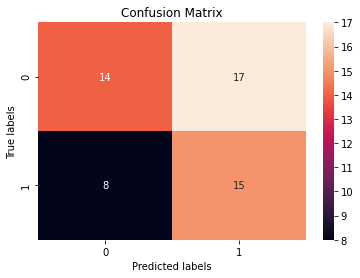

In [20]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

## Predicting Primary Cancer Site as a binary variable

In [21]:
df_filtered =  df.iloc[:, 41:52]
df_filtered["Primary Cancer Site 2"] = df["Primary Cancer Site 2"]
df_filtered["DEATH [d from CT]"] = df["DEATH [d from CT]"]

df_filtered['Primary Cancer Site 2'] = df_filtered['Primary Cancer Site 2'].fillna(0)
df_filtered["DEATH [d from CT]"] = df_filtered["DEATH [d from CT]"].fillna(0)

df_filtered.loc[df_filtered['DEATH [d from CT]']== 0,'Death' ] = 0
df_filtered.loc[df_filtered['DEATH [d from CT]']>0,'Death' ] = 1

df_filtered.loc[df_filtered['Primary Cancer Site 2']== 0,'Cancer' ] = 0
df_filtered.loc[df_filtered['Primary Cancer Site 2'] != 0,'Cancer' ] = 1


In [22]:
death_df = pd.concat([df_filtered[df_filtered["Cancer"]==0].head(1400),
                 df_filtered[df_filtered["Cancer"]==1]], ignore_index=True, sort=False)

for i in range(15):
    death_df.iloc[:,i] = pd.to_numeric(death_df.iloc[:,i], errors='coerce')
for i in range(11):
    death_df.iloc[:,i].fillna(value=death_df.iloc[:,i].mean(),inplace = True)

In [23]:

death_df["Cancer"].value_counts()

0.0    1400
1.0     127
Name: Cancer, dtype: int64

In [24]:
X = np.array(death_df.iloc[:,0:11])
Y = np.array(death_df.iloc[:,-1])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.20)

### Model 1: Random Forest

In [25]:
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
 
print("TRAINING ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred))

y_pred = clf.predict(X_test)
 
print("TESTING ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

TRAINING ACCURACY OF THE MODEL:  1.0
TESTING ACCURACY OF THE MODEL:  0.9019607843137255


## Predicting Alzheimers DX as a binary variable


In [26]:
df_filtered =  df.iloc[:, 41:52]
df_filtered["Alzheimers DX"] = df["Alzheimers DX"]
df_filtered["DEATH [d from CT]"] = df["DEATH [d from CT]"]

df_filtered['Alzheimers DX'] = df_filtered['Alzheimers DX'].fillna(0)
df_filtered["DEATH [d from CT]"] = df_filtered["DEATH [d from CT]"].fillna(0)

df_filtered.loc[df_filtered['DEATH [d from CT]']== 0,'Death' ] = 0
df_filtered.loc[df_filtered['DEATH [d from CT]']>0,'Death' ] = 1

df_filtered.loc[df_filtered['Alzheimers DX']== 0,'Alzheimers' ] = 0
df_filtered.loc[df_filtered['Alzheimers DX'] != 0,'Alzheimers' ] = 1


In [27]:
death_df = pd.concat([df_filtered[df_filtered["Alzheimers"]==0].head(80),
                 df_filtered[df_filtered["Alzheimers"]==1]], ignore_index=True, sort=False)

for i in range(15):
    death_df.iloc[:,i] = pd.to_numeric(death_df.iloc[:,i], errors='coerce')
for i in range(11):
    death_df.iloc[:,i].fillna(value=death_df.iloc[:,i].mean(),inplace = True)

In [28]:
death_df["Alzheimers"].value_counts()

0.0    80
1.0    53
Name: Alzheimers, dtype: int64

In [29]:
X = np.array(death_df.iloc[:,0:11])
Y = np.array(death_df.iloc[:,-1])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.20)

### Model 1: Random Forest

In [30]:
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
 
print("TRAINING ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred))

y_pred = clf.predict(X_test)
 
print("TESTING ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

TRAINING ACCURACY OF THE MODEL:  1.0
TESTING ACCURACY OF THE MODEL:  0.5555555555555556


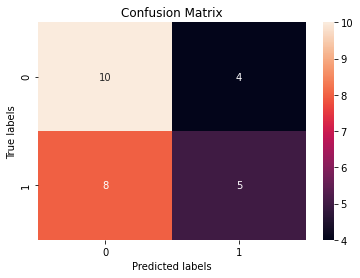

In [31]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);